# Customer Segmentation Project

## Importing Libraries

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
import numpy as np
import warnings
from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Dataset

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("CustomerData.csv")
data.shape  

(8950, 18)

## Data Preprocessing

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

All the features are in number format

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Checking Null values in all features.
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Computing Mean of every column.
columns_means = data.mean()
print(columns_means)

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64


In [8]:
# Adding mean value in null spaces of column Genetic Preigre.
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(864.206)
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(4494.44)

In [9]:
# ReChecking Null values in all features.
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Checking Data Types of every column.
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [11]:
# Dropping Unnecessary Column.
data.drop('CUST_ID',axis=1,inplace=True)

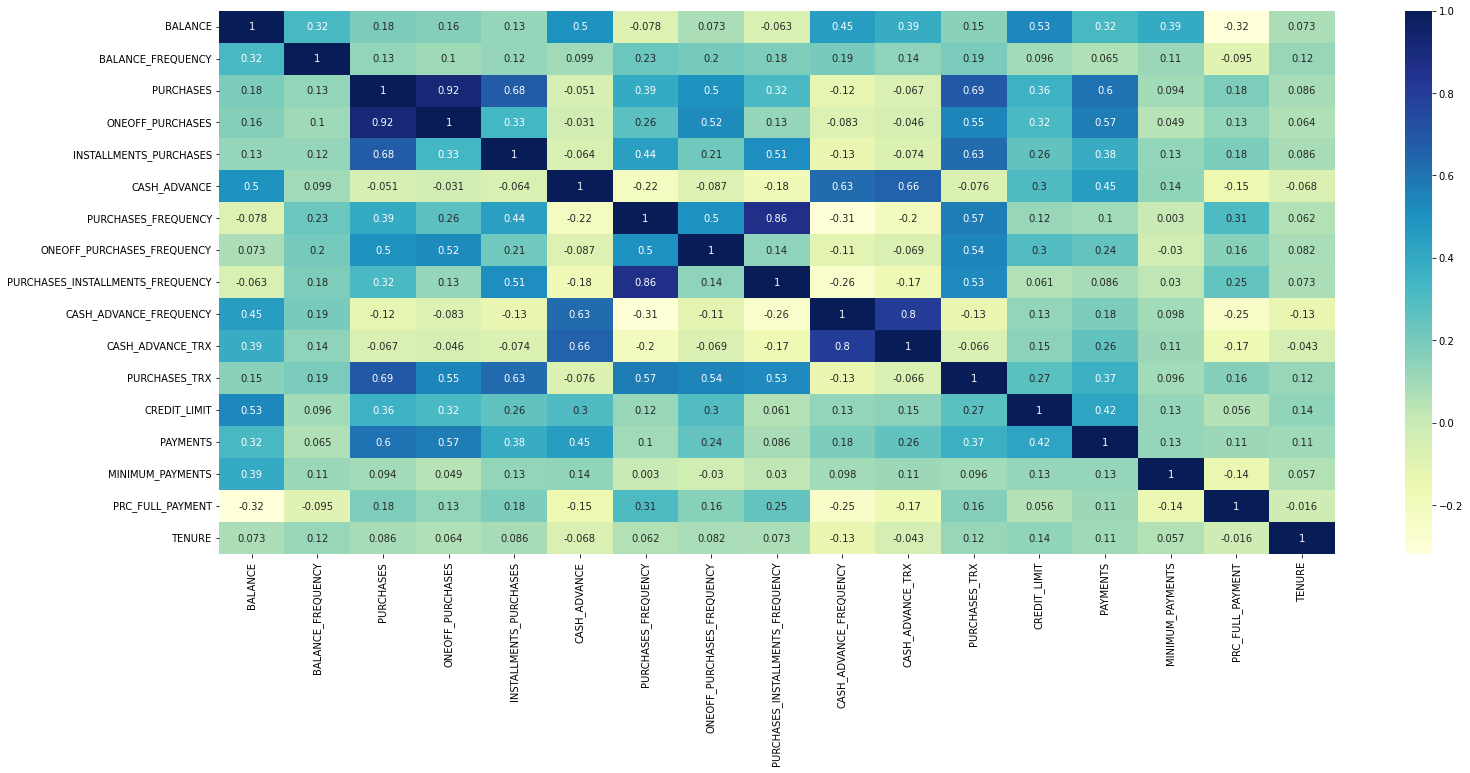

In [12]:
#Now lets try plotting the correlation heatmap

plt.figure(figsize = (25,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

### Scaling Dataset

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

scaling.fit(data)
data_scaled = scaling.transform(data)

In [14]:
data_scaled = pd.DataFrame(data_scaled, columns= data.columns)

In [15]:
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


### Principal Component Analysis

In [16]:
#use pca to reduce dimensionality
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data = reduced_matrix, columns = ['PCA 1','PCA 2'])
pca_df

,PCA 1,PCA 2
0,-0.482164,-0.097656
1,-0.608577,-0.019379
2,0.304507,0.920946
3,-0.588622,-0.005605
4,-0.554354,0.052965
...,...,...
8945,0.646921,-0.463044
8946,0.549893,-0.406711
8947,0.360389,-0.422647
8948,-0.646095,-0.204332


### Elbow Method : Finding optimum number of clusters

The elbow method is a heuristic approach for selecting the optimal number of clusters in a clustering algorithm. The number of clusters at which the rate of decrease in WCSS slows down significantly is considered to be the optimal number of clusters.

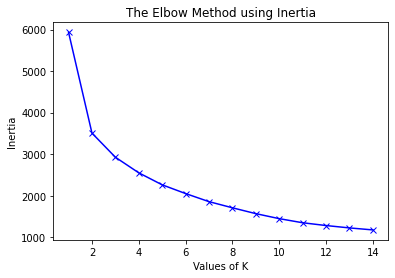

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(data_scaled))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

As we can see that deflection on elbow method are at point 2. so we will try clusters 2 , 3 and 4 and check out silhoutte scores for each.

### K Mean Clustering

Silhouette score: 0.5830803256417881


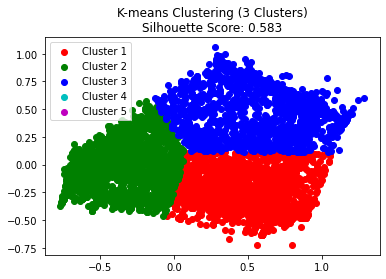

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[kmeans.labels_ == i, 0], reduced_matrix[kmeans.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"K-means Clustering ({3} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

Silhouette score: 0.5763351668324449


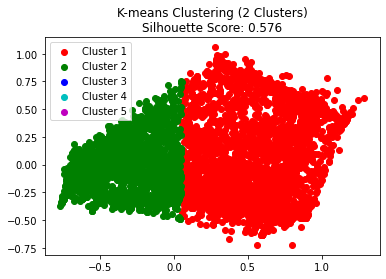

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[kmeans.labels_ == i, 0], reduced_matrix[kmeans.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"K-means Clustering ({2} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

Silhouette score: 0.5284862035871304


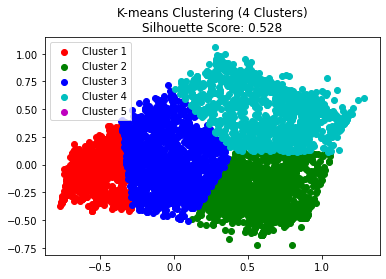

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[kmeans.labels_ == i, 0], reduced_matrix[kmeans.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"K-means Clustering ({4} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

As we can see, we are getting best silhoutte score on 3 number of clusters. so we will create 3 clusters now.

In [21]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(data_scaled)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

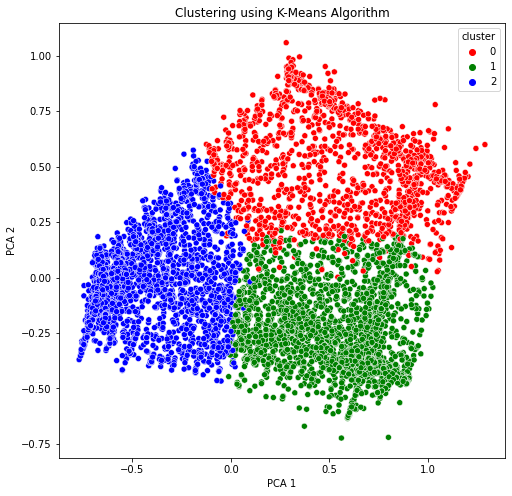

In [23]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA 1",y="PCA 2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

## Agglomarative Clustering

Silhouette score: 0.5498388394319277


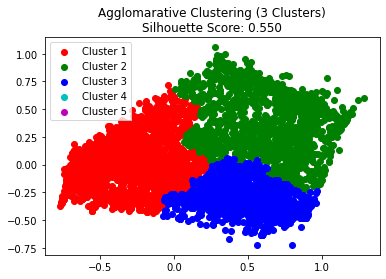

In [29]:
from sklearn.cluster import AgglomerativeClustering


agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
agglo.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, agglo.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[agglo.labels_ == i, 0], reduced_matrix[agglo.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"Agglomarative Clustering ({3} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

Silhouette score: 0.5703436517055999


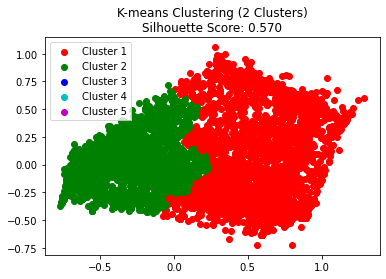

In [27]:
from sklearn.cluster import AgglomerativeClustering


agglo = AgglomerativeClustering(n_clusters=2, linkage="ward")
agglo.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, agglo.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[agglo.labels_ == i, 0], reduced_matrix[agglo.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"K-means Clustering ({2} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

Silhouette score: 0.4577932014868991


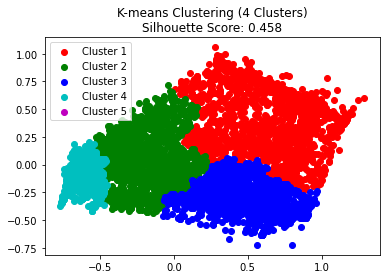

In [28]:
agglo = AgglomerativeClustering(n_clusters=4, linkage="ward")
agglo.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, agglo.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[agglo.labels_ == i, 0], reduced_matrix[agglo.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"K-means Clustering ({4} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

### Mean Shift Clustering

Silhouette score: 0.5165572822348243


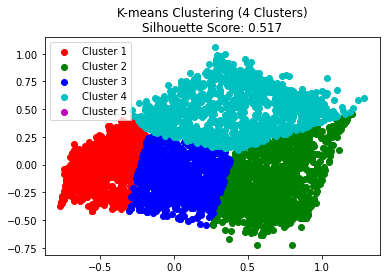

In [32]:
#labels = MeanShift().fit_predict(data_scaled)
from sklearn.cluster import MeanShift
agglo = MeanShift().fit(reduced_matrix)
agglo.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, agglo.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[agglo.labels_ == i, 0], reduced_matrix[agglo.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"K-means Clustering ({4} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

### Inverse Scaling

Now we are scaling back to original form of the data.

In [ ]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[data.columns])
# inverse transform the data
cluster_centers = scaling.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1924.914811,0.973706,3197.352536,2393.314193,804.038344,658.917943,0.893007,0.798486,0.480963,0.093550,2.336798,42.324324,6699.097209,3231.043031,777.509781,0.270895,11.751906
1,1139.550204,0.914001,1066.589684,268.991991,798.242293,503.092784,0.870993,0.098667,0.819980,0.070737,1.731129,20.823149,3946.881014,1392.303954,930.903744,0.237825,11.515097
2,1704.586025,0.826193,295.799164,232.894470,63.093763,1356.714019,0.143265,0.081543,0.060635,0.185768,4.420952,2.677037,4143.556046,1476.370959,851.413239,0.068405,11.446984


In [ ]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([data,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206000,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206000,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


So we have added cluster number with the each record of customer. new column is created named as 'cluster' which show number from which the record belong. This new column will be now our target variable to predict the customer market.

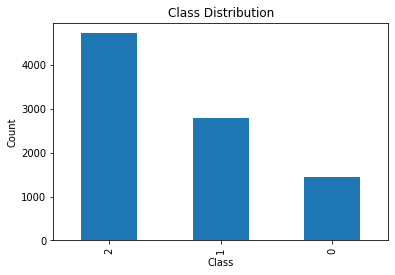

In [ ]:
class_counts = cluster_df['Cluster'].value_counts()
class_counts.plot(kind='bar')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

From the distribution, we can see that most of the reocrds are from cluster 2.

In [ ]:
# Saving newly formed labeled dataset.
cluster_df.to_csv("Clustered_Customer_Data.csv")

## Performing Machine learning to predict the cluster

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X = cluster_df.loc[:, cluster_df.columns != 'Cluster']     # All columns except target variable.
y = cluster_df[['Cluster']]                                # Target Variable.

### Train Test Split

In [ ]:
# we are splitting dataset with 70-30 ratio.
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(6265, 17)
(6265, 1)
(2685, 17)
(2685, 1)


### Applying Machine Learning Models

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=10,n_estimators = 400)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

print('------------------------------------------------------------')

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=8, max_features='auto')
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

print('------------------------------------------------------------')

# XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

print('------------------------------------------------------------')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)
print('------------------------------------------------------------')
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)

Random Forest Accuracy: 0.9865921787709497
------------------------------------------------------------
Decision Tree Accuracy: 0.9467411545623836
------------------------------------------------------------
XGBoost Accuracy: 0.9877094972067039
------------------------------------------------------------
Gradient Boosting Accuracy: 0.9873370577281192
------------------------------------------------------------
KNN Accuracy: 76.57355679702049


In [ ]:
cluster_df.shape

(8950, 18)

### Feature Selection using Random Forest Feature Selector

In [ ]:
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(trainX, trainy)

RandomForestClassifier(n_estimators=50, random_state=100)

<AxesSubplot:xlabel='Features', ylabel='Importances'>

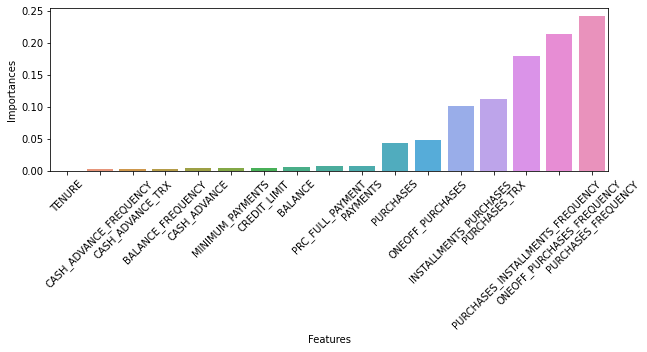

In [ ]:
import seaborn as sns
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": trainX.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

In [ ]:
from sklearn.feature_selection import RFE,SelectFromModel
model_tree = RandomForestClassifier(n_estimators=100,random_state=42)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select= 7, step=1)    # Selecting 9 imporatant Features.
X_train_rfe_tree = sel_rfe_tree.fit_transform(trainX, trainy)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

[False False  True  True  True False  True  True  True False False  True
 False False False False False]
[ 3  9  1  1  1  8  1  1  1 10  7  1  6  4  5  2 11]


In [ ]:
# These are the important features after RFE.
selected_cols = [column for column in trainX.columns if column in trainX.columns[sel_rfe_tree.get_support()]]
selected_cols

['PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'PURCHASES_TRX']

In [ ]:
X = cluster_df[['PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX']]     # All columns except target variable.
y = cluster_df[['Cluster']]                                # Target Variable.

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(6265, 7)
(6265, 1)
(2685, 7)
(2685, 1)


#### Applying Model after selecting relevant features.

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=10,n_estimators = 400)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

print('------------------------------------------------------------')

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=8, max_features='auto')
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

print('------------------------------------------------------------')

# XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

print('------------------------------------------------------------')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)
print('------------------------------------------------------------')
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)

Random Forest Accuracy: 0.986219739292365
------------------------------------------------------------
Decision Tree Accuracy: 0.9746741154562384
------------------------------------------------------------
XGBoost Accuracy: 0.9851024208566108
------------------------------------------------------------
Gradient Boosting Accuracy: 0.9843575418994414
------------------------------------------------------------
KNN Accuracy: 81.60148975791434


### Saving Random Forest Model

As we can see random forest is getting highest accuracy. So we are saving the random forest model.

In [ ]:
import pickle
pickle_out = open("rf.pkl","wb")
pickle.dump(rf, pickle_out)
pickle_out.close()